# Steps to Assess Statistical Significance:
1. Formulate Hypotheses:
    - Null Hypothesis (H0): there is no effect, and any observed results are due to random chance.
    - Alternative Hypothesis (H1 or Ha): there is a real effect or difference.

2. Choose a Significance Level (α): The probability of rejecting the null hypothesis when it is true (Type I error). Commonly 0.05.

3. Select an Appropriate Statistical Test: Common tests include t-tests, chi-square tests, ANOVA, and regression analysis.

4. Calculate the Test Statistic and P-value

5. Report Results and Consider Practical Significance

# Common Statstical Tests
### 1. T-tests
**Purpose** : Compare the means of two groups. <br>
**Assumptions**: Normal distribution of data, equal variances between groups, and independence of observations.<br>
**Types**: <br>
    - One-sample T-Test: Compares the means of the sample data to the population (e.g., Sample from a factory process). <br>
    - Independent (Two-sample) T-test: Compares the means of two independent groups (e.g., comparing the heights of men and women). <br>
    - Paired (Dependent) T-test: Compares the means of two related groups (e.g., comparing the weights of individuals before and after a diet).

### 1.1 Welch's T-Test for Unequal Variances (use this regardless) 
**Note:** Welch's t-test is more robust than Student's t-test. It can be applied without any substantial disadvantages to Student's t-test. It's *not recommended* to pre-test for equal variances and then choose between Student's t-test or Welch's t-test.

### 2. ANOVA (Analysis of Variance):
**Purpose**: Compare the means of two or more groups.<br>
**Assumptions**: Assumes normal distribution of data, homogeneity of variances, and independence of observations.<br>
**Types**:<br>
    - One-way ANOVA: Compares the means of multiple groups based on one factor (e.g., comparing the test scores of students from different schools).<br>
    - Two-way ANOVA: Compares the means of groups based on two factors (e.g., comparing the test scores of students from different schools and different grades). <br>
**Note**: Analysis on a one way ANOVA with two independent samples is a T-test.

### 3. Chi-square Tests:
**Purpose**: Test the relationship between categorical variables. <br>
**Assumptions**: Assumes a sufficient sample size (expected frequencies in each cell should be at least 5) and independence of observations. <br>
**Types**: <br>
    - Test of Independence: Assesses whether there is an association between two categorical variables (e.g., gender and voting preference). <br>
    - Goodness-of-Fit Test: Tests whether the distribution of a single categorical variable matches an expected distribution (e.g., testing if a die is fair).

### 4. Fisher's Exact Test (small sample sizes or small expected frequencies):
**Purpose**: Test the relationship between categorical variables. <br>
**Assumptions**: Assumes a sufficient sample size (expected frequencies in each cell should be at least 5) and independence of observations. <br>

### 5. G-test:
**Purpose**: Increasingly being used in situations where chi-squared tests. <br>

### 6. Regression Analysis:
**Purpose**: Model the relationship between a dependent variable and one or more independent variables.<br>
**Assumptions**: Assumes linearity (linear relationship between dependent and independent variables), independence of errors, homoscedasticity (constant variance of errors), and normality of errors for linear regression. <br>
**Types**:<br>
    - Simple Linear Regression: Models the relationship between a dependent variable and a single independent variable (e.g., predicting sales based on advertising budget).<br>
    - Multiple Linear Regression: Models the relationship between a dependent variable and multiple independent variables (e.g., predicting house prices based on size, location, and number of rooms).<br>
    - Logistic Regression: Used for binary classification problems (e.g., predicting whether a customer will buy a product or not).<br>

# Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
rng = np.random.default_rng()

## T-Tests
### One-Sample:
When you need to compare the mean from a single sample against a known or hypothesized population mean under assumptions of normality and random sampling.

In [50]:
# Example data: sample from normal mean
data = rng.standard_normal(1000)
pop_mean = 0.5 # Known or hypothesized population mean
t_stat, p_value = stats.ttest_1samp(data, pop_mean)

print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value > 1-0.05:  # Assuming a 5% significance level
    print("Reject the null hypothesis - suggest the sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis - suggest the sample mean is not significantly different from the population mean.")


T-statistic: -13.586281551131906
P-value: 1.0536361021359595e-38
Fail to reject the null hypothesis - suggest the sample mean is not significantly different from the population mean.


### Independent (Two-sample):
**Groups**: Compares the means of two independent groups. Subjects in one group have no connection to the subjects in the other group.<br>
**Examples**: Comparing the heights of men and women, or test scores of students from two different schools

In [2]:
def reject_or_accept(A, B, alpha=0.05, type='independent'):
    if type == 'independent':
        t_stat, p_value = stats.ttest_ind(A, B) # Group 1 vs Group 2
    elif type == 'welch':
        t_stat, p_value = stats.ttest_ind(A, B, equal_var=False) # Group 1 vs Group 2 with unequal variance
    elif type == 'paired':
        t_stat, p_value = stats.ttest_rel(A, B) # Before and After
    else:
        ValueError('Test type should be either independent or paired.')
    return True if p_value < alpha else False

def simulate_t_tests(alpha=0.05, type='independent'):
    results = {
        10: [], 
        100: [],
        1000: [],
        10000: []
    }
    for i, sample_size in enumerate(results.keys()):
        for _ in range(1000):
            A = rng.standard_normal(sample_size)
            B = rng.standard_normal(sample_size)
            results[sample_size].append(reject_or_accept(A, B, alpha, type='independent'))
        _, counts = np.unique(np.array(results[sample_size]), return_counts=True)
        print(f"Sample Size: {sample_size} {(len(results)-i)*' '} Reject: {counts[0]}, Accepted: {counts[1]}")

print("Alpha = 0.05 ______________________________________________________")
simulate_t_tests(alpha=0.05, type='independent')
print("\nAlpha = 0.1 ______________________________________________________")
simulate_t_tests(alpha=0.1, type='independent')

Alpha = 0.05 ______________________________________________________
Sample Size: 10      Reject: 936, Accepted: 64
Sample Size: 100     Reject: 952, Accepted: 48
Sample Size: 1000    Reject: 943, Accepted: 57
Sample Size: 10000   Reject: 952, Accepted: 48

Alpha = 0.1 ______________________________________________________
Sample Size: 10      Reject: 907, Accepted: 93
Sample Size: 100     Reject: 905, Accepted: 95
Sample Size: 1000    Reject: 901, Accepted: 99
Sample Size: 10000   Reject: 902, Accepted: 98


### Paired (Dependent):
**Groups**: Compares the means of two related groups. Subjects in these groups are connected. Typically through repeated measurements on the same subjects. <br>
**Examples**: Comparing the weights of individuals before and after a diet, or the test scores of students before and after a specific training program

In [3]:
print("Alpha = 0.05 ______________________________________________________")
simulate_t_tests(alpha=0.05, type='paired')
print("\nAlpha = 0.1 ______________________________________________________")
simulate_t_tests(alpha=0.1, type='paired')

Alpha = 0.05 ______________________________________________________
Sample Size: 10      Reject: 948, Accepted: 52
Sample Size: 100     Reject: 944, Accepted: 56
Sample Size: 1000    Reject: 954, Accepted: 46
Sample Size: 10000   Reject: 953, Accepted: 47

Alpha = 0.1 ______________________________________________________
Sample Size: 10      Reject: 902, Accepted: 98
Sample Size: 100     Reject: 897, Accepted: 103
Sample Size: 1000    Reject: 913, Accepted: 87
Sample Size: 10000   Reject: 913, Accepted: 87


### Welch's t-test for unequal variance

In [4]:
print("Alpha = 0.05 ______________________________________________________")
simulate_t_tests(alpha=0.05, type='welch')
print("\nAlpha = 0.1 ______________________________________________________")
simulate_t_tests(alpha=0.1, type='welch')

Alpha = 0.05 ______________________________________________________
Sample Size: 10      Reject: 942, Accepted: 58
Sample Size: 100     Reject: 953, Accepted: 47
Sample Size: 1000    Reject: 954, Accepted: 46
Sample Size: 10000   Reject: 935, Accepted: 65

Alpha = 0.1 ______________________________________________________
Sample Size: 10      Reject: 890, Accepted: 110
Sample Size: 100     Reject: 913, Accepted: 87
Sample Size: 1000    Reject: 892, Accepted: 108
Sample Size: 10000   Reject: 918, Accepted: 82


### Bonferroni correction
When multiple hypothesis tests are conducted, the Bonferroni correction can help to maintain the overall type I error rate at a desired level.

In [5]:
sample_size = 100
n_tests = 3
data1 = rng.standard_normal(sample_size)
data2 = rng.standard_normal(sample_size)
data3 = rng.standard_normal(sample_size)
t_stat1, p_val1 = stats.ttest_ind(data1, data2)
t_stat2, p_val2 = stats.ttest_ind(data1, data3)
t_stat3, p_val3 = stats.ttest_ind(data2, data3)
print(f"Original p-values: {p_val1:.4f}, {p_val2:.4f}, {p_val3:.4f}")

# Bonferroni correction
alpha = 0.05
bonferroni_alpha = alpha / n_tests
print(f"Bonferroni corrected alpha: {bonferroni_alpha:.4f}")

adjusted_p_val1 = min(p_val1 * n_tests, 1)
adjusted_p_val2 = min(p_val2 * n_tests, 1)
adjusted_p_val3 = min(p_val3 * n_tests, 1)
print(f"Adjusted p-values: {adjusted_p_val1:.4f}, {adjusted_p_val2:.4f}, {adjusted_p_val3:.4f}")

Original p-values: 0.8334, 0.4470, 0.5771
Bonferroni corrected alpha: 0.0167
Adjusted p-values: 1.0000, 1.0000, 1.0000


## Chi-square 
### Test of Independence:

In [6]:
# Rows represent categories of variable 1 (e.g., Gender: Male, Female)
# Columns represent categories of variable 2 (e.g., Preference: Yes, No)
contingency_table = np.array([[30, 20],   #   Male: 30 Yes, 20 No
                              [35, 15]])  # Female: 35 Yes, 15 No

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat:.04f}")
print(f"P-value: {p_value:.04f}")

if p_value < alpha:
    print("Reject the null hypothesis - there is a significant association between the groups and outcomes.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between the groups and outcomes.")


Chi-squared Statistic: 0.7033
P-value: 0.4017
Fail to reject the null hypothesis - there is no significant association between the groups and outcomes.


[Khan Academy: Contingency table chi-square test](https://www.youtube.com/watch?v=hpWdDmgsIRE)

Null Hypothesis: Herbs do nothing <br>
Alternative Hypothesis: Herbs do something

In [7]:
#                 Herb 1      Herb 2   Placebo
data = np.array([[20,         30,      30],        # Sick 
                 [100,        110,     90]])       # Not Sick

chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)
print(f"Chi-squared Statistic: {chi2_stat:.04f}")
print(f"P-value: {p_value:.04f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - the herbs offer patient benefit.")
else:
    print("Fail to reject the null hypothesis - we are not confident that the herbs improved patient outcomes.")

Chi-squared Statistic: 2.5258
P-value: 0.2828
Fail to reject the null hypothesis - we are not confident that the herbs improved patient outcomes.


## Fisher's Exact Test

In [8]:
# Rows represent categories of variable 1 (e.g., Gender: Male, Female)
# Columns represent categories of variable 2 (e.g., Preference: Yes, No)
contingency_table = np.array([[30, 20],   #   Male: 30 Yes, 20 No
                              [35, 15]])  # Female: 35 Yes, 15 No

odds_ratio, p_value = stats.fisher_exact(contingency_table)

print(f"Odds Ratio: {odds_ratio:.04f}")
print(f"P-value: {p_value:.04f}")
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant association between the groups and outcomes.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between the groups and outcomes.")

Odds Ratio: 0.6429
P-value: 0.4019
Fail to reject the null hypothesis - there is no significant association between the groups and outcomes.


## G-Test (Independence):

In [9]:
# Calculate the expected frequencies assuming independence
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
total = contingency_table.sum()
expected = np.outer(row_totals, col_totals) / total

# Calculate the G-statistic
G_statistic = 2 * np.sum(contingency_table * np.log(contingency_table / expected))
degrees_of_freedom = (len(row_totals) - 1) * (len(col_totals) - 1)
p_value = stats.chi2.sf(G_statistic, degrees_of_freedom)

print(f"G-statistic: {G_statistic:.04f}")
print(f"P-value: {p_value:.04f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant association between the two categorical variables.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between the two categorical variables.")

G-statistic: 1.1017
P-value: 0.2939
Fail to reject the null hypothesis - there is no significant association between the two categorical variables.


## Chi-square Goodness-of-Fit Test:
[Khan Academy Example](https://www.youtube.com/watch?v=2QeDRsxSF9M)

In [10]:
#          Day:     M   T   W   T   F   S
expected_freq =   [.1, .1, .15, .2, .3, .15]  # Expected frequencies in each category. By default the categories are assumed to be equally likely.
observed_counts = [30, 14, 34, 45, 57, 20]  # Observed values in each category.
observed_freq = [i/sum(observed_counts) for i in observed_counts] # Normalize observed values to frequencies.
expected_counts = [int(i*sum(observed_counts)) for i in expected_freq]

chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-squared Statistic: {chi2_stat:.04f}")
print(f"P-value: {p_value:.04f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - the observed frequencies do not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis - the observed frequencies match the expected distribution.")


Chi-squared Statistic: 11.4417
P-value: 0.0433
Reject the null hypothesis - the observed frequencies do not match the expected distribution.


## G-Test (Goodness-of-Fit):

In [11]:
observed_counts = np.array(observed_counts)
expected_counts = np.array(expected_counts)

G_statistic = 2 * np.sum(observed_counts * np.log(observed_counts / expected_counts))
degrees_of_freedom = len(observed_counts) - 1
p_value = stats.chi2.sf(G_statistic, degrees_of_freedom)

print(f"G-statistic: {G_statistic:.04f}")
print(f"P-value: {p_value:.04f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference between the observed and expected frequencies.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference between the observed and expected frequencies.")

G-statistic: 11.3865
P-value: 0.0442
Reject the null hypothesis - there is a significant difference between the observed and expected frequencies.


# One-way ANOVA
Tests whether two or more groups have the same population mean. 

[Zedstatstics Example](https://www.youtube.com/watch?v=9cnSWads6oo)

$
\text{Sum of Squares = SST} = \sum ({X - \overline{X}})^2
$

$
\text{Sum of Squares Within Groups = SSW} = \sum ({\overline{X} - \overline{\overline{X}_i}})^2
$

$
\text{Sum of Squares Between Groups = SSB} = \sum ({X_i - \overline{X}})^2
$


$
\text{F} = \frac{\frac{\text{SSB}}{c - 1}} {\frac{\text{SSW}}{n - c}}
\\ \text{Where:}
\\ \quad \text{c = number of categories}
\\ \quad \text{n = number of observations}
$


In [12]:
def SSW(group):
    X_bar = sum(group) / len(group)
    return sum([(num-X_bar)**2 for num in group])

def SSB(group, global_mean):
    X_bar = sum(group) / len(group)
    return len(group) * (X_bar - global_mean)**2

def f_stat(SSB, SSW, n, c):
    return (SSB / (c-1)) / ((SSW)/(n-c))

In [13]:
group1 = [1, 5, 9]
group2 = [3, 5, 7]
group3 = [4, 5, 6]
groups = [group1, group2, group3]

n = sum([len(group) for group in groups])
c = len(groups)
group_means = [sum(group)/len(group) for group in groups]
global_mean = sum(group_means) / len(group_means)

for group in groups:
    print(group, "     F-Statstic:", f_stat(SSB(group, global_mean), SSW(group), n, c), "   SSW:", SSW(group), "   SSB:", SSB(group, global_mean))

[1, 5, 9]      F-Statstic: 0.0    SSW: 32.0    SSB: 0.0
[3, 5, 7]      F-Statstic: 0.0    SSW: 8.0    SSB: 0.0
[4, 5, 6]      F-Statstic: 0.0    SSW: 2.0    SSB: 0.0


In [14]:
group1 = [1, 3, 5]
group2 = [5, 7, 9]
group3 = [4, 5, 6]
groups = [group1, group2, group3]

n = sum([len(group) for group in groups])
c = len(groups)
group_means = [sum(group)/len(group) for group in groups]
global_mean = sum(group_means) / len(group_means)

for group in groups:
    print(group, "     F-Statstic:", f_stat(SSB(group, global_mean), SSW(group), n, c), "   SSW:", SSW(group), "   SSB:", SSB(group, global_mean))

[1, 3, 5]      F-Statstic: 4.5    SSW: 8.0    SSB: 12.0
[5, 7, 9]      F-Statstic: 4.5    SSW: 8.0    SSB: 12.0
[4, 5, 6]      F-Statstic: 0.0    SSW: 2.0    SSB: 0.0


In [15]:
group1 = [20, 21, 19, 22, 24]
group2 = [28, 32, 30, 29, 27]
group3 = [25, 29, 27, 26, 28]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_statistic:.04f}")
print(f"P-value: {p_value:.04f}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis - significant differences exist between the groups.")
else:
    print("Fail to reject null hypothesis - no significant difference between the groups.")

F-statistic: 25.8788
P-value: 0.0000
Reject null hypothesis - significant differences exist between the groups.


## Permutation Test

Observed difference in means: 0.1528
P-value from permutation test: 0.2667


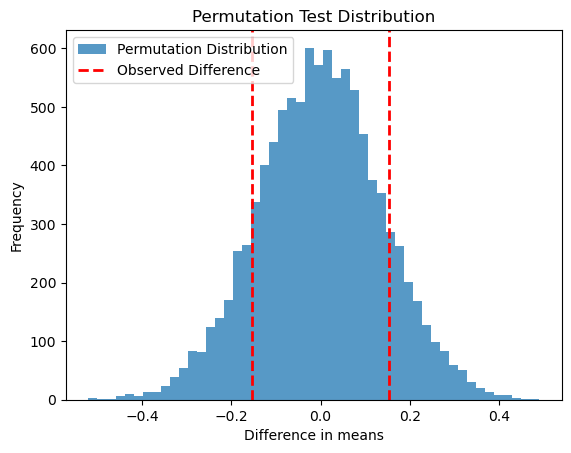

In [32]:
def perform_permutation_test(combined, size1, size2, num_permutations=10000):
    perm_diffs = np.zeros(num_permutations)
    for i in range(num_permutations):
        np.random.shuffle(combined)
        new_group1 = combined[:size1]
        new_group2 = combined[size1:size1+size2]
        perm_diffs[i] = np.mean(new_group2) - np.mean(new_group1)
    return perm_diffs

data_group1 = rng.standard_normal(sample_size)  # Mean score group 1
data_group2 = rng.standard_normal(sample_size) # Mean score of group 2
observed_diff = np.mean(data_group2) - np.mean(data_group1)
combined_data = np.concatenate([data_group1, data_group2])

# Perform the permutation test
perm_diffs = perform_permutation_test(combined_data.copy(), len(data_group1), len(data_group2))
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff:.04f}")
print(f"P-value from permutation test: {p_value:.04f}")

plt.hist(perm_diffs, bins=50, alpha=0.75, label='Permutation Distribution')
plt.axvline(x=observed_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.axvline(x=-observed_diff, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Difference in means')
plt.ylabel('Frequency')
plt.title('Permutation Test Distribution')
plt.show()

# Sequential Testing
## Alpha-Spending
O'Brien-Fleming Method: calculates the alpha threshold for a given interim analysis point. This method provides more stringent alpha control early in the experiment and relaxes as more data becomes available.

In [16]:
def obrien_fleming(spending_time, total_time=1.0, alpha=0.05):
    """ Calculate alpha threshold at a given time using O'Brien-Fleming method """
    return (alpha * (stats.norm.ppf(1 - alpha) / stats.norm.ppf(1 - alpha * spending_time / total_time))**2)


# Points in time when the interim analyses are performed (fraction of total data collected)
analysis_points = [0.25, 0.5, 0.75, 1.0]
total_alpha = 0.05
alpha_thresholds = [obrien_fleming(point, total_time=1.0, alpha=total_alpha) for point in analysis_points]

for point, threshold in zip(analysis_points, alpha_thresholds):
    print(f"Analysis at {point*100}% data: Alpha threshold = {threshold:.4f}")

# Example observed p-values from interim analyses
observed_p_values = [0.049, 0.045, 0.025, 0.01]

# Decisions based on alpha-spending
decisions = ["Reject H0" if p <= alpha else "Do not reject H0" for p, alpha in zip(observed_p_values, alpha_thresholds)]
for point, decision in zip(analysis_points, decisions):
    print(f"Decision at {point*100}% data: {decision}")


Analysis at 25.0% data: Alpha threshold = 0.0269
Analysis at 50.0% data: Alpha threshold = 0.0352
Analysis at 75.0% data: Alpha threshold = 0.0427
Analysis at 100.0% data: Alpha threshold = 0.0500
Decision at 25.0% data: Do not reject H0
Decision at 50.0% data: Do not reject H0
Decision at 75.0% data: Reject H0
Decision at 100.0% data: Reject H0


# Bayesian A/B testing
Estimate the posterior distributions of the metrics of interest (like conversion rates) directly, rather than relying on p-values from hypothesis testing.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A, p_B]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1 seconds.


Probability that B is better than A: 0.91


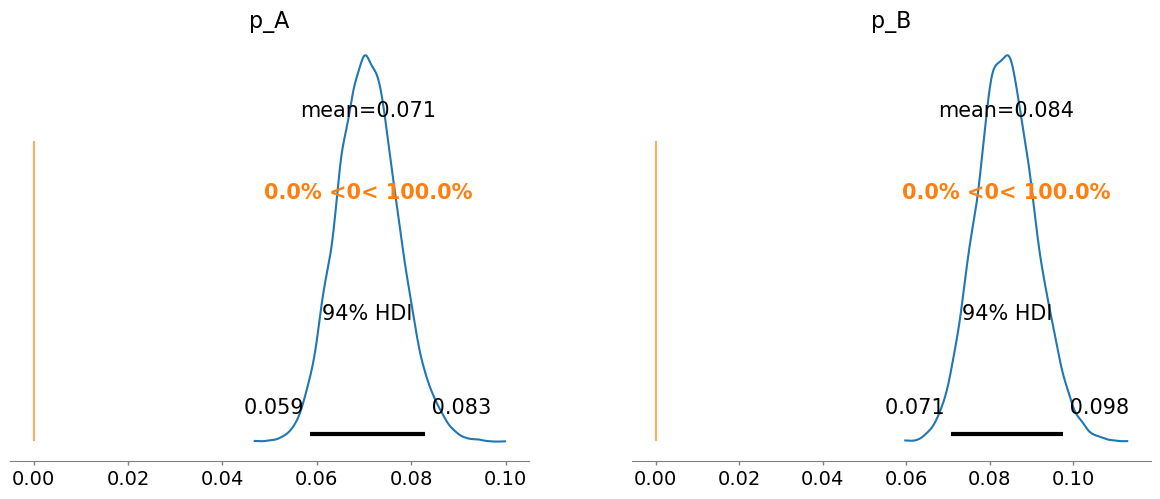

In [27]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Simulated conversion data
# A: Control group
# B: Treatment group
n_A = 1500  # Number of visitors
n_B = 1500
conversions_A = 105  # Number of conversions
conversions_B = 125

with pm.Model() as model:
    # Prior distributions for probabilities of conversion
    p_A = pm.Beta('p_A', alpha=2, beta=10)
    p_B = pm.Beta('p_B', alpha=2, beta=10)

    # Likelihood functions
    obs_A = pm.Binomial('obs_A', n=n_A, p=p_A, observed=conversions_A)
    obs_B = pm.Binomial('obs_B', n=n_B, p=p_B, observed=conversions_B)

    # Sample from the posterior using the No-U-Turn Sampler (NUTS)
    trace = pm.sample(5000, progressbar=False, return_inferencedata=True)  # Ensure InferenceData format is returned

# Plotting the posterior distributions with reference line at 0
az.plot_posterior(trace, var_names=['p_A', 'p_B'], ref_val=0)

# Calculate the probability that B is better than A
prob_B_better_than_A = np.mean(trace.posterior['p_B'].values > trace.posterior['p_A'].values)
print(f"Probability that B is better than A: {prob_B_better_than_A:.2f}")

# Example from [Probabilistic Programming and Bayesian Methods for Hackers](https://nbviewer.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC2.ipynb)

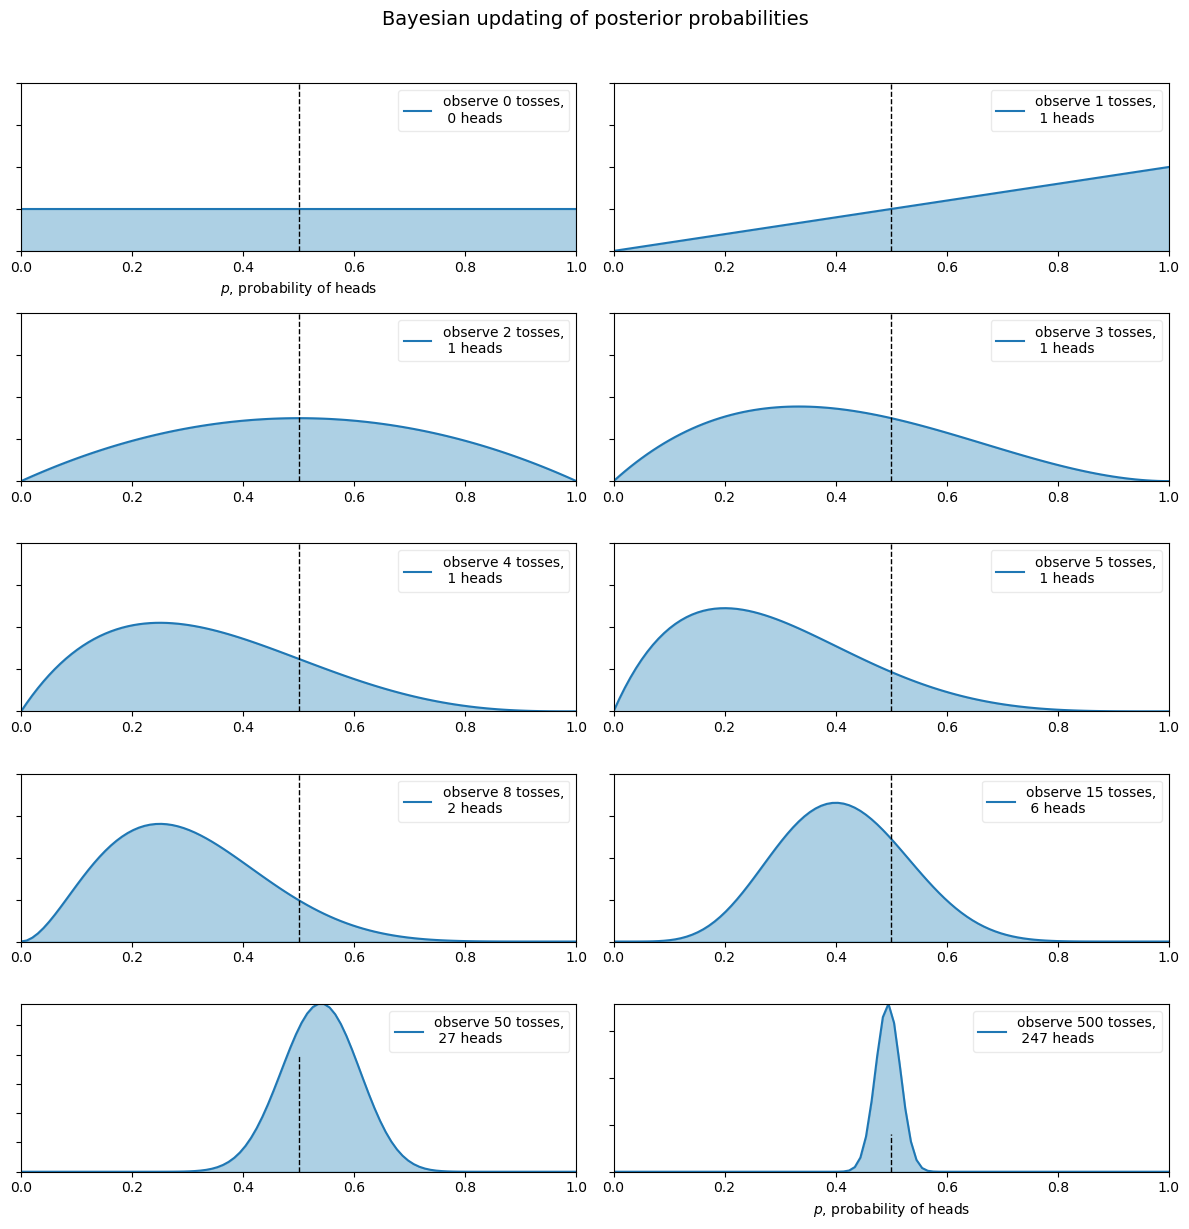

In [38]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

plt.figure(figsize=(12, 12))

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) // 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

# Data Distribution Tests
## Shapiro-Wilk Test (Normal Distributions)
**Purpose**: It checks how well the data conforms to a normal distribution. More powerful than the K-S test in detecting departures from normality, particularly for small to moderate sample sizes (typically less than 50 samples, though it can be used up to 2000).

## Kolmogorov-Smirnov Test
**Purpose**: Used to compare a sample with a reference probability distribution (which can be, but is not limited to, a normal distribution). It tests whether two samples are drawn from the same distribution or to compare a sample with a theoretical distribution such as the normal distribution. Generally, the K-S test is considered reliable for larger samples.